# Use of the wflow OpenStreams framework API

This ipython notebook demonstrates how to load an openstreams python model and execute it step-by-step and investigate the (intermediate) results. The first steps is to load the model and framework:


In [1]:
import os
os.chdir('/mnt/c/Github/wflow/')
os.getcwd()

# First import the model. Here we use the HBV version
from wflow.wflow_topoflex import *
import pcraster as pcr
import numpy as np
import IPython
from IPython.display import display, clear_output
import datetime as dt

#clear_output = IPython.core.display.clear_output

In [6]:
!set PCRASTER_NR_WORKER_THREADS=12

## Set model run-time parameters

 Set the:
 
 - start and time time
 - set the runid (this is where the results are stored, relative to the casename)
 - set the name of the configfile (stire in the case directory
 - set the clone mape (usually the wflow_subcatch.map)
 - set the casename. This is where all the model the model resides



In [2]:
# define start and stop time of the run
#startTime = 1
#stopTime = 200
#currentTime = 1
     
# set runid, cl;onemap and casename. Also define the ini file
runId = "test_dt"
#configfile="wflow_hbv_mem.ini"
configfile="wflow_topoflex3.ini"
wflow_cloneMap = 'clone.map' 

# the casename points to the complete model setup with both static and dynamic input
caseName="./examples/wflow_maas_topoflex/"

import datetime
firstTimestep = 1
timestepsecs = 3600

datetimestart=dt.datetime(2011, 9, 1, 1)
datetimeend= dt.datetime(2011, 9, 2, 8)

step_diff = (datetimeend - datetimestart).total_seconds() / timestepsecs

lastTimeStep =  firstTimestep + step_diff
print(step_diff, lastTimeStep)

31.0 32.0


In [3]:
#make a usermodel object     
myModel = WflowModel(wflow_cloneMap, caseName,runId,configfile)

In [4]:
#dynModelFw = wf_DynamicFramework(myModel,datetimestart=datetimestart, datetimeend=datetimeend, firstTimestep=firstTimestep, lastTimeStep=24,  timestepsecs=timestepsecs, mode="steps")
#print(dynModelFw.DT)
dynModelFw = wf_DynamicFramework(myModel, datetimestart=datetimestart, lastTimeStep=lastTimeStep, firstTimestep=firstTimestep, timestepsecs=timestepsecs, mode="steps")
print(dynModelFw.DT)

{'runStartTime': datetime.datetime(2011, 9, 1, 1, 0), 'runEndTime': datetime.datetime(2011, 9, 2, 8, 0), 'timeStepSecs': 3600, 'currentTimeStep': 0, 'lastTimeStep': 32.0, 'startadjusted': 0, 'startendadjusted': 0, 'currentmode': 'steps', 'callstopupdate': 2, 'runStateTime': datetime.datetime(2011, 9, 1, 0, 0), 'setByBMI': False, 'currentDateTime': datetime.datetime(2011, 9, 1, 0, 0), 'outPutStartTime': datetime.datetime(2011, 9, 1, 1, 0), 'runTimeSteps': 32.0, 'currentMonth': 9, 'currentYday': 244, 'currentHour': 0, 'nextDateTime': datetime.datetime(2011, 9, 1, 1, 0)}


In [5]:
dynModelFw.createRunId(NoOverWrite=False, logfname="wflow.log", level=logging.DEBUG, model="wflow_topoflex") #DEBUG

2024-03-15 19:11:01,176 - wflow_topoflex - pcrut - DEBUG - File logging to /mnt/c/Github/wflow/examples/wflow_maas_topoflex/test_dt/wflow.log
2024-03-15 19:11:01,177 - wflow_topoflex - wf_DynamicFramework - INFO - wflow_topoflex 1.0.0 Case: /mnt/c/Github/wflow/examples/wflow_maas_topoflex Runid: test_dt
2024-03-15 19:11:01,178 - wflow_topoflex - wf_DynamicFramework - INFO - Initialise framework version: 1.0.0
2024-03-15 19:11:01,183 - wflow_topoflex - wf_DynamicFramework - WARNING - Ini file does not contain model name, assuming wflow.wflow_topoflex
2024-03-15 19:11:01,184 - wflow_topoflex - wf_DynamicFramework - DEBUG - Creating parameter specification for par: Precipitation (['inmaps/P0000000_', 'timeseries', '0.0', '1'])
2024-03-15 19:11:01,185 - wflow_topoflex - wf_DynamicFramework - DEBUG - Creating parameter specification for par: PotEvaporation (['inmaps/PET00000_', 'timeseries', '0.0', '1'])
2024-03-15 19:11:01,206 - wflow_topoflex - wf_DynamicFramework - INFO - Adding csv outp

In [6]:
print(dynModelFw.DT)

{'runStartTime': datetime.datetime(2011, 9, 1, 1, 0), 'runEndTime': datetime.datetime(2011, 9, 9, 8, 0), 'timeStepSecs': 3600, 'currentTimeStep': 1, 'lastTimeStep': 200.0, 'startadjusted': 0, 'startendadjusted': 0, 'currentmode': 'steps', 'callstopupdate': 8, 'runStateTime': datetime.datetime(2011, 9, 1, 0, 0), 'setByBMI': False, 'currentDateTime': datetime.datetime(2011, 9, 1, 0, 0), 'outPutStartTime': datetime.datetime(2011, 9, 1, 1, 0), 'runTimeSteps': 200.0, 'currentMonth': 9, 'currentYday': 244, 'currentHour': 0, 'nextDateTime': datetime.datetime(2011, 9, 1, 1, 0)}


In [7]:
# Run the initial part of the model (reads parameters and sets initial values)
#dynModelFw.setupFramework()
dynModelFw._runInitial() # Runs initial part
#dynModelFw.setQuiet(True)

2024-03-15 19:11:03,457 - wflow_topoflex - wflow_topoflex - INFO - running for 200 timesteps
2024-03-15 19:11:03,493 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/staticmaps/wflow_maxSlope.map)  not present, returning 0.0
2024-03-15 19:11:03,637 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/staticmaps/wflow_riverlength.map)  not present, returning 0.0
2024-03-15 19:11:03,676 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/staticmaps/wflow_riverwidth.map)  not present, returning 0.0
2024-03-15 19:11:03,745 - wflow_topoflex - wf_DynamicFramework - INFO - Adding Precipitation to model.
2024-03-15 19:11:03,747 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/inmaps/P0000000_.map)  not present, returning 0.0
2024-03-

In [8]:
dynModelFw._runResume() # gets the state variables from disk
# Get list of variables supplied by the model
dynModelFw._runDynamic(firstTimestep, lastTimeStep)
#print(dynModelFw.wf_supplyVariableNamesAndRoles())
dynModelFw._runSuspend()


2024-03-15 19:11:06,980 - wflow_topoflex - wf_DynamicFramework - INFO - saving maps
2024-03-15 19:11:06,990 - wflow_topoflex - wf_DynamicFramework - DEBUG - timestep: 1/200.0 (2011-09-01 01:00:00)
2024-03-15 19:11:07,228 - wflow_topoflex - wf_DynamicFramework - INFO - saving maps
2024-03-15 19:11:07,234 - wflow_topoflex - wf_DynamicFramework - DEBUG - timestep: 2/200.0 (2011-09-01 02:00:00)
2024-03-15 19:11:07,471 - wflow_topoflex - wf_DynamicFramework - INFO - saving maps
2024-03-15 19:11:07,476 - wflow_topoflex - wf_DynamicFramework - DEBUG - timestep: 3/200.0 (2011-09-01 03:00:00)
2024-03-15 19:11:07,713 - wflow_topoflex - wf_DynamicFramework - INFO - saving maps
2024-03-15 19:11:07,719 - wflow_topoflex - wf_DynamicFramework - DEBUG - timestep: 4/200.0 (2011-09-01 04:00:00)
2024-03-15 19:11:07,970 - wflow_topoflex - wf_DynamicFramework - INFO - saving maps
2024-03-15 19:11:07,976 - wflow_topoflex - wf_DynamicFramework - DEBUG - timestep: 5/200.0 (2011-09-01 05:00:00)
2024-03-15 19:1

In [9]:
dynModelFw._wf_shutdown()

# re-init?

In [2]:
# set runid, cl;onemap and casename. Also define the ini file
runId = "test2"
#configfile="wflow_hbv_mem.ini"
configfile="wflow_topoflex2.ini"
wflow_cloneMap = 'clone.map' 
caseName="./examples/wflow_maas_topoflex/"

#make a usermodel object     

myModel = WflowModel(wflow_cloneMap, caseName,runId,configfile)
dynModelFw = wf_DynamicFramework(myModel, 20,1)
dynModelFw.createRunId(NoOverWrite=True, logfname="wflow.log", level=logging.DEBUG, model="wflow_topoflex")

2024-03-11 19:10:56,268 - wflow_topoflex - pcrut - DEBUG - File logging to /mnt/c/Github/wflow/examples/wflow_maas_topoflex/test2/wflow.log
2024-03-11 19:10:56,269 - wflow_topoflex - wf_DynamicFramework - INFO - wflow_topoflex 1.0.0 Case: /mnt/c/Github/wflow/examples/wflow_maas_topoflex Runid: test2
2024-03-11 19:10:56,270 - wflow_topoflex - wf_DynamicFramework - INFO - Initialise framework version: 1.0.0
2024-03-11 19:10:56,275 - wflow_topoflex - wf_DynamicFramework - WARNING - Ini file does not contain model name, assuming wflow.wflow_topoflex
2024-03-11 19:10:56,276 - wflow_topoflex - wf_DynamicFramework - INFO - Not enough information in the [run] section. Need start and end time or a runinfo.xml file.... Reverting to default date/time
2024-03-11 19:10:56,281 - wflow_topoflex - wf_DynamicFramework - DEBUG - Creating parameter specification for par: Precipitation (['inmaps/P', 'timeseries', '0.0', '1'])
2024-03-11 19:10:56,282 - wflow_topoflex - wf_DynamicFramework - DEBUG - Creatin

In [3]:
dynModelFw._runInitial() # Runs initial part
dynModelFw._runResume() # Runs initial part
dynModelFw._runDynamic(11, 20)

2024-03-11 19:11:03,035 - wflow_topoflex - wflow_topoflex - INFO - running for 20 timesteps
2024-03-11 19:11:03,106 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/staticmaps/wflow_maxSlope.map)  not present, returning 0.0
2024-03-11 19:11:03,274 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/staticmaps/wflow_riverlength.map)  not present, returning 0.0
2024-03-11 19:11:03,323 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/staticmaps/wflow_riverwidth.map)  not present, returning 0.0
2024-03-11 19:11:03,388 - wflow_topoflex - wf_DynamicFramework - INFO - Adding Precipitation to model.
2024-03-11 19:11:03,390 - wflow_topoflex - wf_DynamicFramework - DEBUG - Static input data (/mnt/c/Github/wflow/examples/wflow_maas_topoflex/inmaps/P.map)  not present, returning 0.0
2024-03-11 19:11:

In [4]:
dynModelFw._runSuspend()
dynModelFw._wf_shutdown()

2024-03-11 19:11:12,776 - wflow_topoflex - wflow_topoflex - INFO - Saving initial conditions...
2024-03-11 19:11:12,777 - wflow_topoflex - wf_DynamicFramework - INFO - Saving summary maps to disk...


## Investigate a couple of model variables

In [11]:
qs = dynModelFw.wf_supplyMapAsNumpy("Qs")
print(qs)

[]


In [10]:
#
#sm = dynModelFw.wf_supplyMapAsNumpy("UStoreLayerDepth")
#sm = pcr.pcr2numpy(sm[0], -999.0)
#sm = np.flipud(sm).copy()
#sm[sm == -999] = np.nan
#uz = dynModelFw.wf_supplyMapAsNumpy("SatWaterDepth")
#uz[uz == -999] = np.nan

qs = dynModelFw.wf_supplyMapAsNumpy("Qs")
qs[qs == -999] = np.nan


imshow(np.flipud(qs))
title("Qs")
colorbar()


IndexError: list assignment index out of range

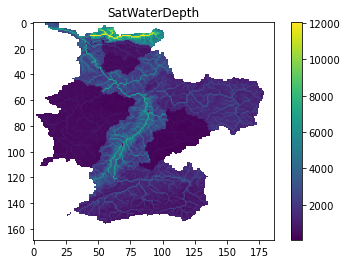

In [39]:
imshow(np.flipud(uz))
title("SatWaterDepth")
colorbar()

In [40]:
dynModelFw.wf_setValueLdd("TopoLdd",5.0,6.46823,51.6821)
npmap0 = dynModelFw.wf_supplyMapAsNumpy("TopoLdd")
ltt = dynModelFw.wf_supplyMapAsList("SurfaceRunoff")

## Run for a number of timesteps

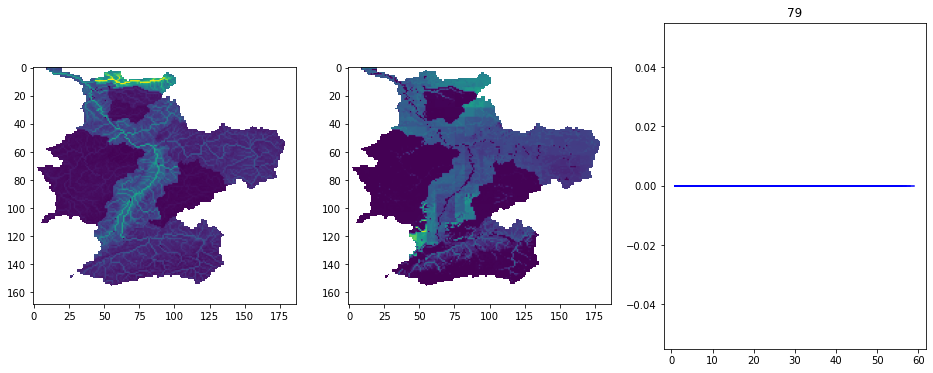

In [41]:
f, ax = plt.subplots(1,3,figsize=(16, 6))

plotar = []

for ts in range(20,80):
         # Get value at pit
      
        inflowQ = dynModelFw.wf_supplyScalar("RiverRunoff",5.68962,50.7307)
        plotar.append(inflowQ)   
        # Add inflow to outflow
        #dynModelFw.wf_setValue("ForecQ_qmec", -1.0 * inflowQ  ,6.46823,51.6821)
        Resoutflow = inflowQ
        dynModelFw.wf_setValues("PET", 2.0)
        #dynModelFw.wf_setValue("ForecQ_qmec",inflowQ * 1000 ,6.47592,51.7288)
        # update runoff ONLY NEEDED IF YOU FIDDLE WITH THE KIN_WAVE RESERVOIR
        myModel.updateKinWaveVolume()
        dynModelFw._runDynamic(ts,ts) # runs for all timesteps
        #dynModelFw.wf_setValue("SurfaceRunoff",0.0,6.46823,51.6821)
        #dynModelFw.wf_setValue("SurfaceRunoff",0.0,6.11535,51.8425)
        npmap0 = dynModelFw.wf_supplyMapAsNumpy("ForecQ_qmec")
        npmap1 = dynModelFw.wf_supplyMapAsNumpy("P")
        run = dynModelFw.wf_supplyMapAsNumpy("RiverRunoff")
        uz = dynModelFw.wf_supplyMapAsNumpy("SatWaterDepth")
        sm = dynModelFw.wf_supplyMapAsNumpy("UStoreLayerDepth")
        sm = pcr.pcr2numpy(sm[0], -999.0)
        sm = np.flipud(sm).copy()       
        sm[sm == -999] = np.nan
        #dynModelFw.wf_setValues("UpperZoneStorage",uz * 10.1)
        uz[uz == -999] = np.nan
        run[run == -999] = np.nan
        ax[0].imshow(np.flipud(uz))
        ax[1].imshow(np.flipud(sm))
        #ax[2].imshow(log(run))
        ax[2].plot(plotar,'b')
        ax[2].set_title(str(ts))
        clear_output()
        display(f)
        
plt.close()

In [42]:
dynModelFw._runSuspend() # saves the state variables
dynModelFw._wf_shutdown()

In [43]:
run = dynModelFw.wf_supplyMapAsNumpy("RiverRunoff")
run[run == -999] = np.nan

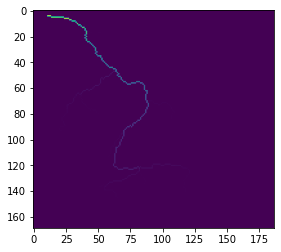

In [44]:
imshow(np.flipud(run))

In [45]:
plotar


[nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]